In [1]:
# BUSINESS PROBLEM : using machine learning , we need to figure out whether a hotel booing will be caancelled or not

In [2]:
import numpy as np
import pandas as pd
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
init_notebook_mode(connected =True)
import plotly.express as ps
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)



In [3]:
df1= pd.read_csv('C:\\Users\\hp\\hotel_bookings.csv')
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### DATA PREPROCESSING

#### MISSING VALUE TREATMENT

In [6]:
#aim:
#from info we can see that few columns dont add up to 119390. So these should be missisng values that needs to be treated

In [9]:
nulls = round((df1.isnull().sum()/df1.shape[0])*100,2) #to see % of null values in each columns.We remove columns with high null %
nulls

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [8]:
#from the above info we see that compaany and agent has a very high number of null values. we will remove them
#Also i see country, but the % is low, so we can use the mode value replacement
#lets see if we are missing any more null values that might have been too small to come up as a percentage

In [10]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#we seee chidren column to be having null values as well

In [12]:
#lets start with removing agent and company
df1.drop(['agent','company'],axis=1,inplace=True)

In [13]:
df1.isnull().sum()


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [14]:
#lets remove null values from country
df1['country'].fillna(df1['country'].mode()[0],inplace=True)

In [15]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
#lastly lets see what are the unique values in children column
df1[df1['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


In [17]:
#lets drop them as there are only 4 rows
df1 = df1.dropna(subset=['children'])

In [18]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

////////////////////////////Done with Missing Values///////////////////////////////

#### DATA CLEANING

In [19]:
#remove rows where no of children, babies, and parents =0

In [20]:
impossible = (df1['children']==0) & (df1['babies']==0) & (df1['adults']==0)

In [21]:
df2=df1[~impossible]

In [22]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [24]:
df2.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### INITIAL DATA ANALYSIS TO UNDERSTAND DIFFERENT TRENDS

In [25]:
#LET US FIRST Examine the relationship between 'is_canceled' and other variables such as 'lead_time', 'previous_cancellations', 'booking_changes', etc.

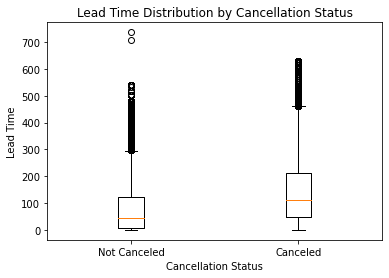

In [42]:
# Creating the box plot
plt.boxplot([df2[df2['is_canceled'] == 0]['lead_time'], df2[df2['is_canceled'] == 1]['lead_time']],
            labels=['Not Canceled', 'Canceled'])

# Adding labels and title
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.title('Lead Time Distribution by Cancellation Status')

# Display the plot
plt.show()

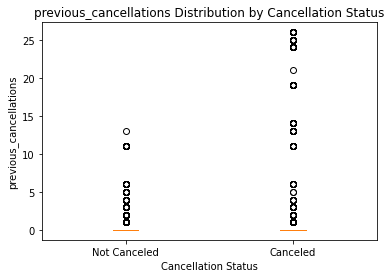

In [43]:
# Creating the box plot
plt.boxplot([df2[df2['is_canceled'] == 0]['previous_cancellations'], df2[df2['is_canceled'] == 1]['previous_cancellations']],
            labels=['Not Canceled', 'Canceled'])

# Adding labels and title
plt.xlabel('Cancellation Status')
plt.ylabel('previous_cancellations')
plt.title('previous_cancellations Distribution by Cancellation Status')

# Display the plot
plt.show()

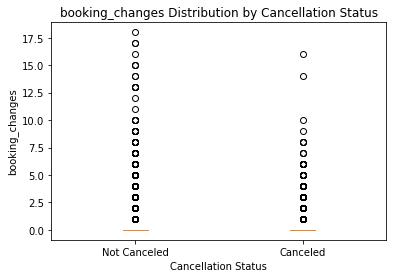

In [44]:
# Creating the box plot
plt.boxplot([df2[df2['is_canceled'] == 0]['booking_changes'], df2[df2['is_canceled'] == 1]['booking_changes']],
            labels=['Not Canceled', 'Canceled'])

# Adding labels and title
plt.xlabel('Cancellation Status')
plt.ylabel('booking_changes')
plt.title('booking_changes Distribution by Cancellation Status')

# Display the plot
plt.show()

 Determine if there is any seasonality in bookings by analyzing 'arrival_date_month' and 'arrival_date_week_number'.
Compare the booking patterns and cancellation rates between weekends ('stays_in_weekend_nights') and weekdays ('stays_in_week_nights').

In [47]:
#to find the most busy month
df2['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [48]:
data_resort=df2[(df2['hotel']=='Resort Hotel') & (df2['is_canceled']==0)]
data_city = df2[(df2['hotel']=='City Hotel') & (df2['is_canceled']==0)]

In [49]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [50]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [51]:
final_rush=rush_resort.merge(rush_city,on='month')

In [52]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [53]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [54]:
#now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
#so very first we have to provide right hierarchy to the month column

In [55]:
!pip install sorted-months-weekdays

## Dependency package needs to be installed
!pip install sort_dataframeby_monthorweek

In [56]:
import sort_dataframeby_monthorweek as sd

In [57]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [62]:
ps.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])


In [63]:
#now lets see reservation during weekend and weekdays for bothtype of hotels

In [64]:
data_resort_weekend=df2[(df2['hotel']=='Resort Hotel') & (df2['is_canceled']==0) &(df2['stays_in_weekend_nights']!=0)]
data_city_weekend = df2[(df2['hotel']=='City Hotel') & (df2['is_canceled']==0) &(df2['stays_in_weekend_nights']!=0)]

In [70]:
data_resort_weekday=df2[(df2['hotel']=='Resort Hotel') & (df2['is_canceled']==0) &(df2['stays_in_week_nights']!=0)]
data_city_weekday = df2[(df2['hotel']=='City Hotel') & (df2['is_canceled']==0) &(df2['stays_in_week_nights']!=0)]

In [68]:
rush_resort_weekend=data_resort_weekend['arrival_date_month'].value_counts().reset_index()
rush_resort_weekend.columns=['month','no_of_guests']
rush_resort_weekend

,month,no_of_guests
0,August,2479
1,July,2320
2,May,1671
3,October,1634
4,April,1632
5,September,1540
6,June,1419
7,March,1316
8,February,1199
9,November,984


In [69]:
rush_city_weekend=data_city_weekend['arrival_date_month'].value_counts().reset_index()
rush_city_weekend.columns=['month','no_of_guests']
rush_city_weekend

,month,no_of_guests
0,August,2959
1,July,2712
2,October,2341
3,May,2341
4,April,2339
5,June,2255
6,March,2194
7,September,2131
8,February,1599
9,November,1394


In [73]:
final_rush_weekend=rush_resort_weekend.merge(rush_city_weekend,on='month')

In [74]:
final_rush_weekend.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [75]:
final_rush_weekend=sd.Sort_Dataframeby_Month(final_rush_weekend,'month')

In [76]:
ps.line(data_frame=final_rush_weekend,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

In [71]:
rush_resort_weekday=data_resort_weekday['arrival_date_month'].value_counts().reset_index()
rush_resort_weekday.columns=['month','no_of_guests']
rush_resort_weekday

,month,no_of_guests
0,August,3053
1,July,2965
2,April,2393
3,March,2389
4,October,2304
5,May,2276
6,February,2091
7,September,2011
8,June,1929
9,December,1815


In [72]:
rush_city_weekday=data_city_weekday['arrival_date_month'].value_counts().reset_index()
rush_city_weekday.columns=['month','no_of_guests']
rush_city_weekday

,month,no_of_guests
0,August,5013
1,July,4423
2,May,4183
3,June,3997
4,October,3933
5,September,3873
6,March,3822
7,April,3793
8,February,2861
9,November,2517


In [77]:
final_rush_weekday=rush_resort_weekday.merge(rush_city_weekday,on='month')
final_rush_weekday.columns=['month','no_of_guests_in_resort','no_of_guests_city']
final_rush_weekday=sd.Sort_Dataframeby_Month(final_rush_weekday,'month')
ps.line(data_frame=final_rush_weekday,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

In [84]:
#cost of rooms pe night for various room types

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [83]:
data2=df2[df2['is_canceled']==0]

In [86]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

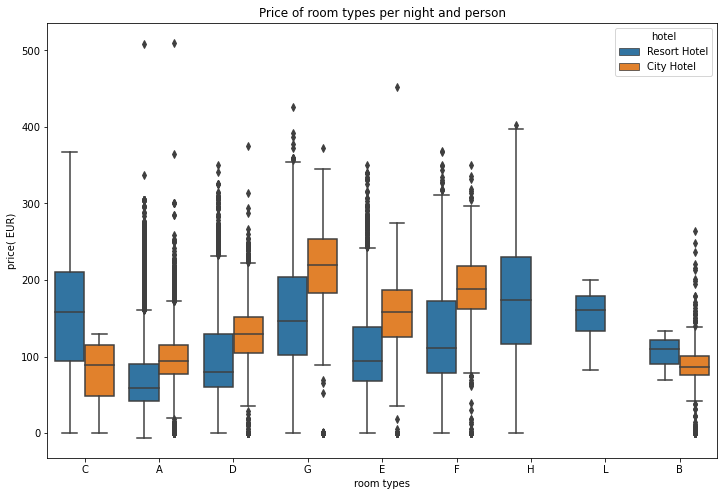

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

## ADD NEW FEATURES

In [88]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [127]:
df2['weekend_or_weekday']=df2.apply(week_function,axis=1)

In [128]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_both_weekdays_weekends
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_both_weekdays_weekends
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_both_weekdays_weekends
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_both_weekdays_weekends


In [129]:
df2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    60387
stay_just_weekdays             51248
stay_just_weekend               6926
undefined_data                   645
Name: count, dtype: int64

In [130]:
group_by_month=df2.groupby('arrival_date_month')['weekend_or_weekday'].value_counts().unstack()

In [132]:
group_by_month=group_by_month.reset_index()

In [133]:
group_by_month.set_index('arrival_date_month',inplace=True)

<AxesSubplot:xlabel='arrival_date_month'>

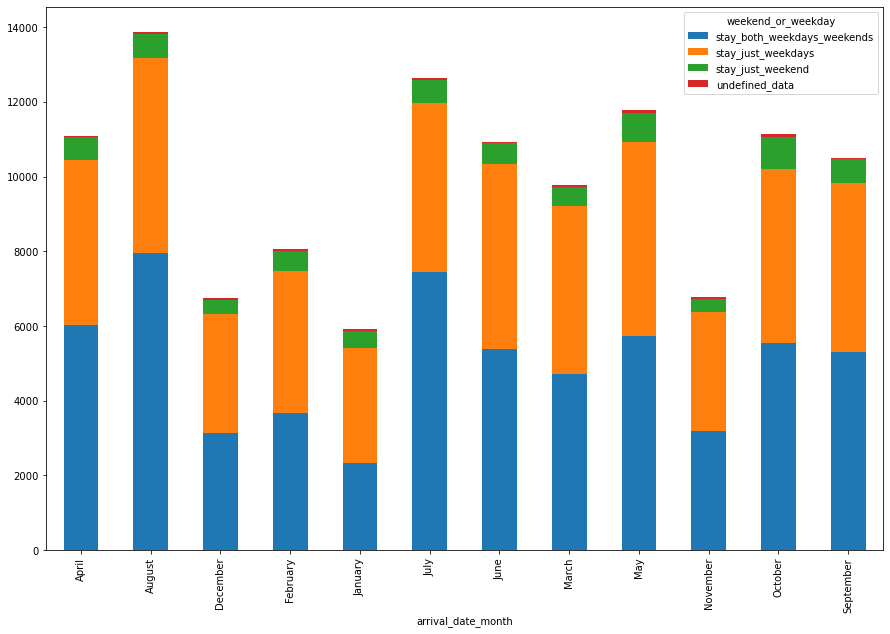

In [134]:
group_by_month.plot(kind='bar',stacked=True,figsize=(15,10))

In [136]:
#add family column where i returs 1 if there is a family and returns 0 id there are no family. Family =1 when adult+children+babies!=0
def is_family(row):
    if row['adults']+row['children']+row['babies']>0:
        return 1
    else:
        return 0

In [138]:
df2['is_family']=df2.apply(is_family,axis=1)

In [139]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekdays,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekdays,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_weekdays,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_both_weekdays_weekends,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_both_weekdays_weekends,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_both_weekdays_weekends,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_both_weekdays_weekends,1


In [140]:
df2['total_customer'] = df2['adults'] + df2['babies'] + df2['children']

In [141]:
df2['total_nights']=df2['stays_in_week_nights'] + df2['stays_in_weekend_nights']

In [142]:
df2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data,1,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data,1,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays,1,1.0,1


In [212]:
df3=df2.copy()

In [213]:
df3.drop(columns=['adults', 'children', 'babies'],axis=1,inplace=True)

In [214]:
#separate numerical and categotical columns

In [215]:
numeric_columns =[i for i in df3.columns if df3[i].dtype!='object']
categorical_columns =[i for i in df3.columns if df3[i].dtype=='object']

In [216]:
print(numeric_columns)
print("\n")
print(categorical_columns)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'is_family', 'total_customer', 'total_nights']


['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'weekend_or_weekday']


In [217]:
numeric_data=df3[numeric_columns]
categorical_data =df3[categorical_columns]

In [218]:
#lets change categorical columns to numerical columns

In [219]:
df3.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178299372149724, 'Resort Hotel': 0.27767373336329815}

In [220]:
categorical_data['canceled'] = df3['is_canceled']

In [221]:
categorical_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,canceled
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015,undefined_data,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,7/1/2015,undefined_data,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,7/2/2015,stay_just_weekdays,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,7/2/2015,stay_just_weekdays,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,7/3/2015,stay_just_weekdays,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,9/6/2017,stay_both_weekdays_weekends,0
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,9/7/2017,stay_both_weekdays_weekends,0
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,9/7/2017,stay_both_weekdays_weekends,0
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,9/7/2017,stay_both_weekdays_weekends,0


In [222]:
### Perform Mean Encoding Technique 

for col in categorical_data:
    dict2=categorical_data.groupby([col])['canceled'].mean().to_dict()
    categorical_data[col]=categorical_data[col].map(dict2)

In [223]:
categorical_data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,canceled
0,0.277674,0.374644,0.374078,0.562923,0.153644,0.174868,0.330827,0.188186,0.283992,0.407864,0.0,0.800000,0.035659,0.0
1,0.277674,0.374644,0.374078,0.562923,0.153644,0.174868,0.330827,0.188186,0.283992,0.407864,0.0,0.800000,0.035659,0.0
2,0.277674,0.374644,0.374078,0.202310,0.153644,0.174868,0.391567,0.188186,0.283992,0.407864,0.0,0.985075,0.379722,0.0
3,0.277674,0.374644,0.374078,0.202310,0.187618,0.220568,0.391567,0.445055,0.283992,0.407864,0.0,0.985075,0.379722,0.0
4,0.277674,0.374644,0.374078,0.202310,0.367578,0.410598,0.391567,0.445055,0.283992,0.407864,0.0,0.522876,0.379722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417830,0.377643,0.374078,0.202391,0.343313,0.410598,0.391567,0.445055,0.283992,0.407864,0.0,0.000000,0.378161,0.0
119386,0.417830,0.377643,0.374078,0.185848,0.367578,0.410598,0.292683,0.251603,0.283992,0.407864,0.0,0.000000,0.378161,0.0
119387,0.417830,0.377643,0.374078,0.167193,0.367578,0.410598,0.318108,0.251373,0.283992,0.407864,0.0,0.000000,0.378161,0.0
119388,0.417830,0.377643,0.374078,0.202310,0.367578,0.410598,0.391567,0.445055,0.283992,0.407864,0.0,0.000000,0.378161,0.0


In [224]:
concatenated_df=pd.concat([categorical_data,numeric_data],axis=1)

In [225]:
concatenated_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
0,0.277674,0.374644,0.374078,0.562923,0.153644,0.174868,0.330827,0.188186,0.283992,0.407864,...,0,0,3,0,0.00,0,0,1,2.0,0
1,0.277674,0.374644,0.374078,0.562923,0.153644,0.174868,0.330827,0.188186,0.283992,0.407864,...,0,0,4,0,0.00,0,0,1,2.0,0
2,0.277674,0.374644,0.374078,0.202310,0.153644,0.174868,0.391567,0.188186,0.283992,0.407864,...,0,0,0,0,75.00,0,0,1,1.0,1
3,0.277674,0.374644,0.374078,0.202310,0.187618,0.220568,0.391567,0.445055,0.283992,0.407864,...,0,0,0,0,75.00,0,0,1,1.0,1
4,0.277674,0.374644,0.374078,0.202310,0.367578,0.410598,0.391567,0.445055,0.283992,0.407864,...,0,0,0,0,98.00,0,1,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417830,0.377643,0.374078,0.202391,0.343313,0.410598,0.391567,0.445055,0.283992,0.407864,...,0,0,0,0,96.14,0,0,1,2.0,7
119386,0.417830,0.377643,0.374078,0.185848,0.367578,0.410598,0.292683,0.251603,0.283992,0.407864,...,0,0,0,0,225.43,0,2,1,3.0,7
119387,0.417830,0.377643,0.374078,0.167193,0.367578,0.410598,0.318108,0.251373,0.283992,0.407864,...,0,0,0,0,157.71,0,4,1,2.0,7
119388,0.417830,0.377643,0.374078,0.202310,0.367578,0.410598,0.391567,0.445055,0.283992,0.407864,...,0,0,0,0,104.40,0,0,1,2.0,7


In [226]:
concatenated_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'weekend_or_weekday', 'canceled',
       'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [227]:
df4 = concatenated_df.copy() # i want to remove 'stays_in_weekend_nights', 'stays_in_week_nights' here and perform simultaneous calculation

In [234]:
df4.drop(['canceled','stays_in_week_nights','stays_in_weekend_nights'],axis =1,inplace=True)

KeyError: "['canceled', 'stays_in_week_nights', 'stays_in_weekend_nights'] not found in axis"

In [235]:
concatenated_df.drop('canceled', axis=1, inplace =True,)

KeyError: "['canceled'] not found in axis"

lets try to find outliers by plottinng scatter plot for 'is_canceled' column vs all numerical columns

Text(0.5, 1.0, 'is_canceled vs leadtime')

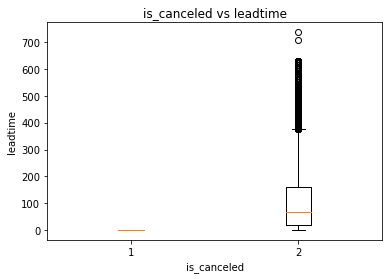

In [236]:
plt.boxplot([numeric_data['is_canceled'], numeric_data['lead_time']])
plt.xlabel('is_canceled')
plt.ylabel('leadtime')
plt.title('is_canceled vs leadtime')

In [237]:
numeric_data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

Text(0.5, 1.0, 'is_canceled vs arrival_date_year')

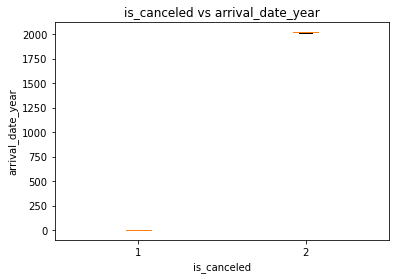

In [238]:
plt.boxplot([numeric_data['is_canceled'], numeric_data['arrival_date_year']])
plt.xlabel('is_canceled')
plt.ylabel('arrival_date_year')
plt.title('is_canceled vs arrival_date_year')

Text(0.5, 1.0, 'is_canceled vs stays_in_weekend_nights')

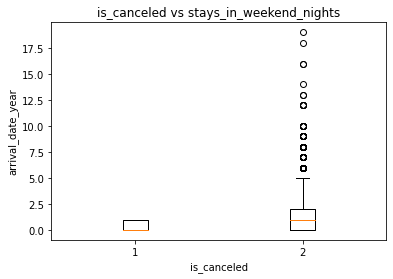

In [239]:
plt.boxplot([numeric_data['is_canceled'], numeric_data['stays_in_weekend_nights']])
plt.xlabel('is_canceled')
plt.ylabel('arrival_date_year')
plt.title('is_canceled vs stays_in_weekend_nights')

Text(0.5, 1.0, 'is_canceled vs stays_in_week_nights')

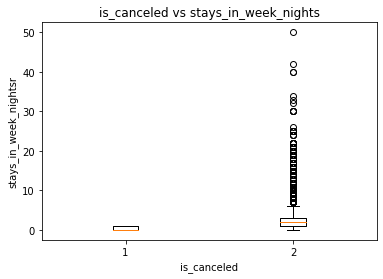

In [240]:
plt.boxplot([numeric_data['is_canceled'], numeric_data['stays_in_week_nights']])
plt.xlabel('is_canceled')
plt.ylabel('stays_in_week_nightsr')
plt.title('is_canceled vs stays_in_week_nights')

Text(0.5, 1.0, 'is_canceled vs adr')

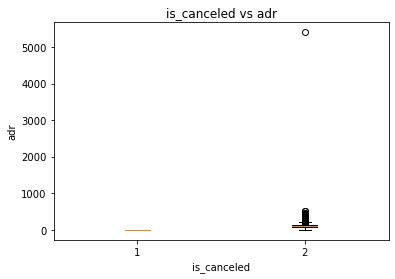

In [241]:
plt.boxplot([numeric_data['is_canceled'], numeric_data['adr']])
plt.xlabel('is_canceled')
plt.ylabel('adr')
plt.title('is_canceled vs adr')

In [242]:
def handle_outlier(col):
    concatenated_df[col]=np.log1p(concatenated_df[col])

In [243]:
handle_outlier('lead_time')

In [244]:
handle_outlier('adr')

In [245]:
concatenated_df.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status                0
reservation_status_date           0
weekend_or_weekday                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests   

In [246]:
concatenated_df= concatenated_df.dropna(subset=['adr'])

In [247]:
concatenated_df.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status                0
reservation_status_date           0
weekend_or_weekday                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Select important Features using Co-relation & univariate analysis

In [248]:
corr=concatenated_df.corr()

In [249]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
hotel,1.000000,0.051206,0.061769,-0.040647,0.102600,0.182318,0.197609,0.280680,0.172805,-0.008372,...,-0.012260,-0.004450,-0.076561,0.072728,0.154101,-0.218962,-0.043509,NaN,-0.038772,-0.249728
arrival_date_month,0.051206,1.000000,-0.010171,-0.052399,0.047991,0.077025,-0.038548,0.015482,0.057638,-0.029665,...,0.008815,-0.021925,-0.011056,0.029234,0.227951,-0.021939,0.002620,NaN,0.078886,0.045575
meal,0.061769,-0.010171,1.000000,0.022441,-0.025998,-0.025393,0.010007,0.013953,0.047522,0.105777,...,0.103628,0.011090,-0.027180,-0.031566,-0.019868,0.003443,0.006879,NaN,-0.003443,-0.055667
country,-0.040647,-0.052399,0.022441,1.000000,0.078938,-0.130131,0.153238,0.125462,0.395722,-0.029274,...,0.093270,0.091810,-0.061480,0.067058,-0.160461,0.007620,-0.200866,NaN,-0.117366,-0.160740
market_segment,0.102600,0.047991,-0.025998,0.078938,1.000000,0.540376,0.183070,0.209403,0.396776,-0.265573,...,0.074736,-0.117546,-0.057621,0.096421,-0.003868,-0.145749,-0.155581,NaN,-0.023955,-0.004530
distribution_channel,0.182318,0.077025,-0.025393,-0.130131,0.540376,1.000000,0.070647,0.119162,0.115732,-0.023016,...,-0.003847,-0.142672,-0.118383,0.048054,0.126879,-0.146893,0.074785,NaN,0.087641,0.085072
reserved_room_type,0.197609,-0.038548,0.010007,0.153238,0.183070,0.070647,1.000000,0.722703,0.201841,-0.143124,...,0.049278,0.022541,-0.040433,0.068343,-0.185765,-0.093282,-0.161413,NaN,-0.246297,-0.188744
assigned_room_type,0.280680,0.015482,0.013953,0.125462,0.209403,0.119162,0.722703,1.000000,0.263324,-0.083977,...,0.063300,-0.003204,-0.096362,0.067079,-0.038394,-0.130990,-0.135278,NaN,-0.228985,-0.103496
deposit_type,0.172805,0.057638,0.047522,0.395722,0.396776,0.115732,0.201841,0.263324,1.000000,0.122325,...,0.143316,-0.031484,-0.120846,0.120156,-0.015217,-0.095169,-0.268058,NaN,-0.082648,-0.104886
customer_type,-0.008372,-0.029665,0.105777,-0.029274,-0.265573,-0.023016,-0.143124,-0.083977,0.122325,1.000000,...,-0.021364,0.024735,-0.095489,-0.101868,0.117494,0.061775,0.137189,NaN,0.124376,0.037782


In [251]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488319
deposit_type                      0.481561
country                           0.357197
lead_time                         0.320180
market_segment                    0.266999
assigned_room_type                0.201642
distribution_channel              0.177082
hotel                             0.137049
customer_type                     0.136696
previous_cancellations            0.110147
adr                               0.081753
weekend_or_weekday                0.073191
reserved_room_type                0.072830
arrival_date_month                0.069870
days_in_waiting_list              0.054308
meal                              0.050580
total_customer                    0.044811
stays_in_week_nights              0.025561
total_nights                      0.018579
arrival_date_year                 0.016702
arrival_date_week_number          0.008291
stays_in_we

In [253]:
concatenated_df.drop(['reservation_status','reservation_status_date','deposit_type','is_family','total_of_special_requests','required_car_parking_spaces','booking_changes','is_repeated_guest','previous_bookings_not_canceled','arrival_date_day_of_month','arrival_date_day_of_month','stays_in_weekend_nights','arrival_date_week_number'], axis=1,inplace=True)

In [256]:
concatenated_df.shape

(119205, 19)

### Feature selection

In [257]:
concatenated_df.isna().sum()

hotel                     0
arrival_date_month        0
meal                      0
country                   0
market_segment            0
distribution_channel      0
reserved_room_type        0
assigned_room_type        0
customer_type             0
weekend_or_weekday        0
is_canceled               0
lead_time                 0
arrival_date_year         0
stays_in_week_nights      0
previous_cancellations    0
days_in_waiting_list      0
adr                       0
total_customer            0
total_nights              0
dtype: int64

In [258]:
## separate dependent & independent features

In [259]:
x=concatenated_df.drop('is_canceled',axis=1)

In [260]:
y=concatenated_df['is_canceled']

In [261]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [262]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

In [263]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [264]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [265]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True])

In [266]:
cols=x.columns

In [267]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

# selected_feature

In [269]:
x=x[selected_feature]

In [270]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119205, dtype: int64

### build the ML model

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
logreg=LogisticRegression()

In [275]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [276]:
pred=logreg.predict(X_test)

In [277]:
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [278]:
from sklearn.metrics import confusion_matrix

In [279]:
confusion_matrix(y_test,pred)

array([[16693,  2028],
       [ 4831,  6250]], dtype=int64)

In [280]:
from sklearn.metrics import accuracy_score

In [281]:
accuracy_score(y_test,pred)

0.7698476612307898

In [282]:
def handle_outlier(col):
    df4[col]=np.log1p(df4[col])

In [283]:
handle_outlier('adr')

In [284]:
df4.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status                0
reservation_status_date           0
weekend_or_weekday                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer              

In [285]:
df4= df4.dropna(subset=['adr'])

In [286]:
df4.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status                0
reservation_status_date           0
weekend_or_weekday                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer              

In [287]:
corr2=df4.corr()

In [288]:
corr2

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
hotel,1.000000,0.051206,0.061769,-0.040647,0.102600,0.182318,0.197609,0.280680,0.172805,-0.008372,...,-0.012260,-0.004450,-0.076561,0.072728,0.154101,-0.218962,-0.043509,NaN,-0.038772,-0.249728
arrival_date_month,0.051206,1.000000,-0.010171,-0.052399,0.047991,0.077025,-0.038548,0.015482,0.057638,-0.029665,...,0.008815,-0.021925,-0.011056,0.029234,0.227951,-0.021939,0.002620,NaN,0.078886,0.045575
meal,0.061769,-0.010171,1.000000,0.022441,-0.025998,-0.025393,0.010007,0.013953,0.047522,0.105777,...,0.103628,0.011090,-0.027180,-0.031566,-0.019868,0.003443,0.006879,NaN,-0.003443,-0.055667
country,-0.040647,-0.052399,0.022441,1.000000,0.078938,-0.130131,0.153238,0.125462,0.395722,-0.029274,...,0.093270,0.091810,-0.061480,0.067058,-0.160461,0.007620,-0.200866,NaN,-0.117366,-0.160740
market_segment,0.102600,0.047991,-0.025998,0.078938,1.000000,0.540376,0.183070,0.209403,0.396776,-0.265573,...,0.074736,-0.117546,-0.057621,0.096421,-0.003868,-0.145749,-0.155581,NaN,-0.023955,-0.004530
distribution_channel,0.182318,0.077025,-0.025393,-0.130131,0.540376,1.000000,0.070647,0.119162,0.115732,-0.023016,...,-0.003847,-0.142672,-0.118383,0.048054,0.126879,-0.146893,0.074785,NaN,0.087641,0.085072
reserved_room_type,0.197609,-0.038548,0.010007,0.153238,0.183070,0.070647,1.000000,0.722703,0.201841,-0.143124,...,0.049278,0.022541,-0.040433,0.068343,-0.185765,-0.093282,-0.161413,NaN,-0.246297,-0.188744
assigned_room_type,0.280680,0.015482,0.013953,0.125462,0.209403,0.119162,0.722703,1.000000,0.263324,-0.083977,...,0.063300,-0.003204,-0.096362,0.067079,-0.038394,-0.130990,-0.135278,NaN,-0.228985,-0.103496
deposit_type,0.172805,0.057638,0.047522,0.395722,0.396776,0.115732,0.201841,0.263324,1.000000,0.122325,...,0.143316,-0.031484,-0.120846,0.120156,-0.015217,-0.095169,-0.268058,NaN,-0.082648,-0.104886
customer_type,-0.008372,-0.029665,0.105777,-0.029274,-0.265573,-0.023016,-0.143124,-0.083977,0.122325,1.000000,...,-0.021364,0.024735,-0.095489,-0.101868,0.117494,0.061775,0.137189,NaN,0.124376,0.037782


In [289]:
corr2['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488319
deposit_type                      0.481561
country                           0.357197
lead_time                         0.292937
market_segment                    0.266999
assigned_room_type                0.201642
distribution_channel              0.177082
hotel                             0.137049
customer_type                     0.136696
previous_cancellations            0.110147
adr                               0.081753
weekend_or_weekday                0.073191
reserved_room_type                0.072830
arrival_date_month                0.069870
days_in_waiting_list              0.054308
meal                              0.050580
total_customer                    0.044811
total_nights                      0.018579
arrival_date_year                 0.016702
arrival_date_week_number          0.008291
arrival_date_day_of_month        -0.005910
previous_bo

In [291]:
df4.drop(['reservation_status','deposit_type','is_family','total_of_special_requests','required_car_parking_spaces','booking_changes','is_repeated_guest','previous_bookings_not_canceled','arrival_date_day_of_month','arrival_date_day_of_month'], axis=1,inplace=True)

In [292]:
x=df4.drop('is_canceled',axis=1)
y=df4['is_canceled']

In [293]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [294]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x,y)
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [295]:
cols=x.columns
selected_feature=cols[feature_sel_model.get_support()]

In [296]:
x=x[selected_feature]


In [297]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [298]:
from sklearn.linear_model import LogisticRegression

In [299]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [300]:
pred=logreg.predict(X_test)

In [301]:
confusion_matrix(y_test,pred)

array([[16769,  2031],
       [ 5169,  5833]], dtype=int64)

In [302]:
accuracy_score(y_test,pred)

0.7584054761425407